In [1]:
import pandas as pd

redwine_data = pd.read_csv('winequality-red.csv',sep=';')
redwine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
redwine_data.rename(columns={'fixed acidity':'fixed_acidity','volatile acidity':'volatile_acidity',\
                            'citric acid':'citric_acid','residual sugar':'residual_sugar','free sulfur dioxide':\
                             'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)

In [3]:
redwine_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#Check missing data
redwine_data.loc[(redwine_data['fixed_acidity'].isnull()) |
              (redwine_data['volatile_acidity'].isnull()) |
              (redwine_data['citric_acid'].isnull()) |
              (redwine_data['residual_sugar'].isnull())|
                (redwine_data['free_sulfur_dioxide'].isnull())|
                (redwine_data['total_sulfur_dioxide'].isnull())]

In [ ]:
#Checking nulls
redwine_data.isnull().sum()

In [ ]:
# redwine_data.loc[redwine_data['quality'] == 5, 'fixed_acidity'].hist()

In [ ]:
redwine_data['quality'].unique()

In [ ]:
redwine_data['quality'].value_counts().sort_index()

In [ ]:
#Summary
redwine_data.describe()

In [4]:
#Defining the splits for categories. 1–4 will be poor quality, 5–6 will be average, 7–10 will be great
bins = [1,4,6,10]
#0 for low quality, 1 for average, 2 for great quality
quality_labels=[0,1,2]
redwine_data['quality_categorical'] = pd.cut(redwine_data['quality'], bins=bins, labels=quality_labels, include_lowest=True)
#Displays the first 2 columns
# display(redwine_data.head(n=10))
redwine_data.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_categorical
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,1
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,2
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,2
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,1


In [5]:
# Split the data into features and target label
quality_raw = redwine_data['quality_categorical']
features_raw = redwine_data.drop(['quality', 'quality_categorical'], axis = 1)

In [10]:
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [47]:
features_raw_new = redwine_data.drop(['quality'], axis = 1)
features_raw_new.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality_categorical
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


In [48]:
features_raw_new['quality_categorical'].value_counts()

1    1319
2     217
0      63
Name: quality_categorical, dtype: int64

In [ ]:
# Plot
sb.pairplot(features_raw_new, hue='quality_categorical')
;

In [ ]:
features_raw_new.loc[features_raw_new['quality_categorical'] == 2, 'total sulfur dioxide'].hist()

In [ ]:
# This line drops any high quality wines(quality_categorical=2) rows with a total sulfur dioxide greater than 150
# features_raw_new = features_raw_new.loc[(iris_data['class'] != 'Iris-setosa') | (iris_data['sepal_width_cm'] >= 2.5)]
# iris_data.loc[iris_data['class'] == 'Iris-setosa', 'sepal_width_cm'].hist();
features_raw_new2= features_raw_new.loc[(features_raw_new['quality_categorical'] != 2) | (features_raw_new['total sulfur dioxide'] <= 150)]

In [ ]:
features_raw_new2.loc[features_raw_new2['quality_categorical'] == 2, 'total sulfur dioxide'].hist()

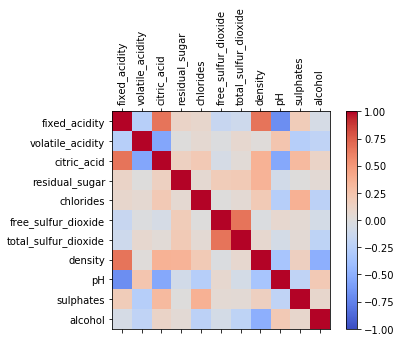

In [23]:
#correlation
corr = features_raw.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(features_raw.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(features_raw.columns)
ax.set_yticklabels(features_raw.columns)
plt.show()

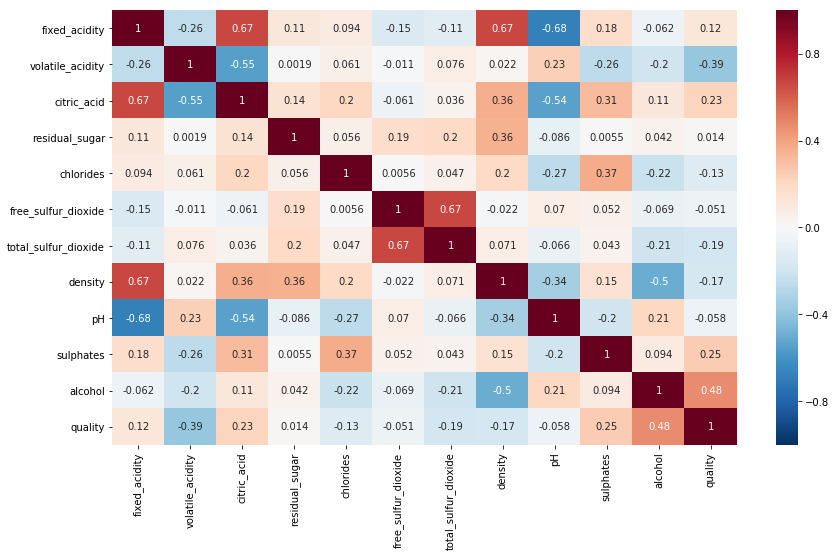

In [25]:
corr = redwine_data.corr()
plt.figure(figsize=(14,8))
sb.heatmap(corr, annot=True, linewidths=0, vmin=-1, cmap='RdBu_r')
plt.show()

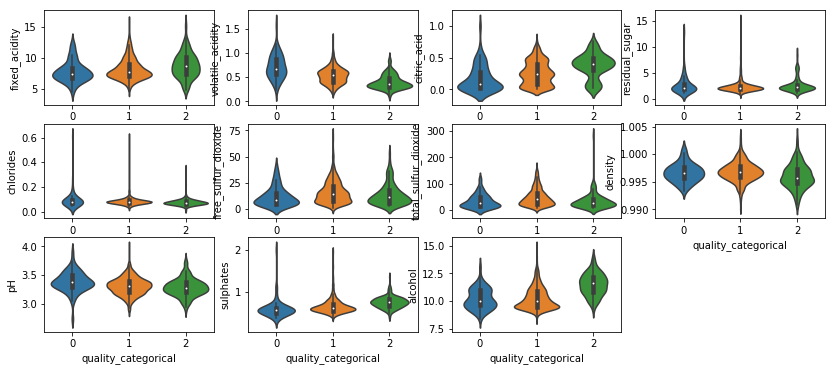

In [53]:
#
plt.figure(figsize=(14,8))

for column_index, column in enumerate(features_raw_new.columns):
    if column == 'quality_categorical':
        continue
    plt.subplot(4, 4, column_index + 1)
    sb.violinplot(x='quality_categorical', y=column, data=features_raw_new)

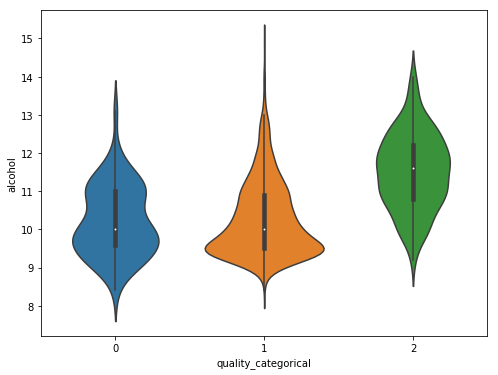

In [39]:
plt.figure(figsize=(8,6))
sb.violinplot(x='quality_categorical', y='alcohol', data=redwine_data)

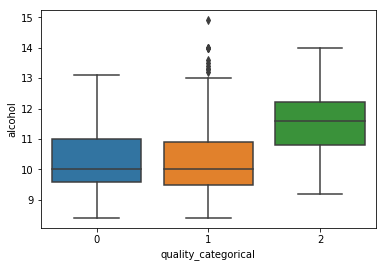

In [43]:
sb.boxplot(x='quality_categorical', y='alcohol', data=redwine_data)

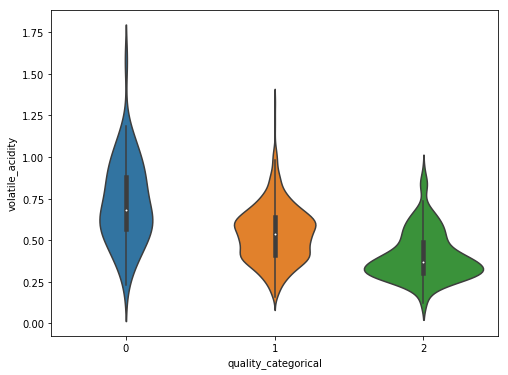

In [44]:
plt.figure(figsize=(8,6))
sb.violinplot(x='quality_categorical', y='volatile_acidity', data=redwine_data)

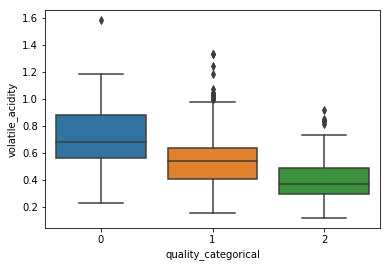

In [45]:
sb.boxplot(x='quality_categorical', y='volatile_acidity', data=redwine_data)

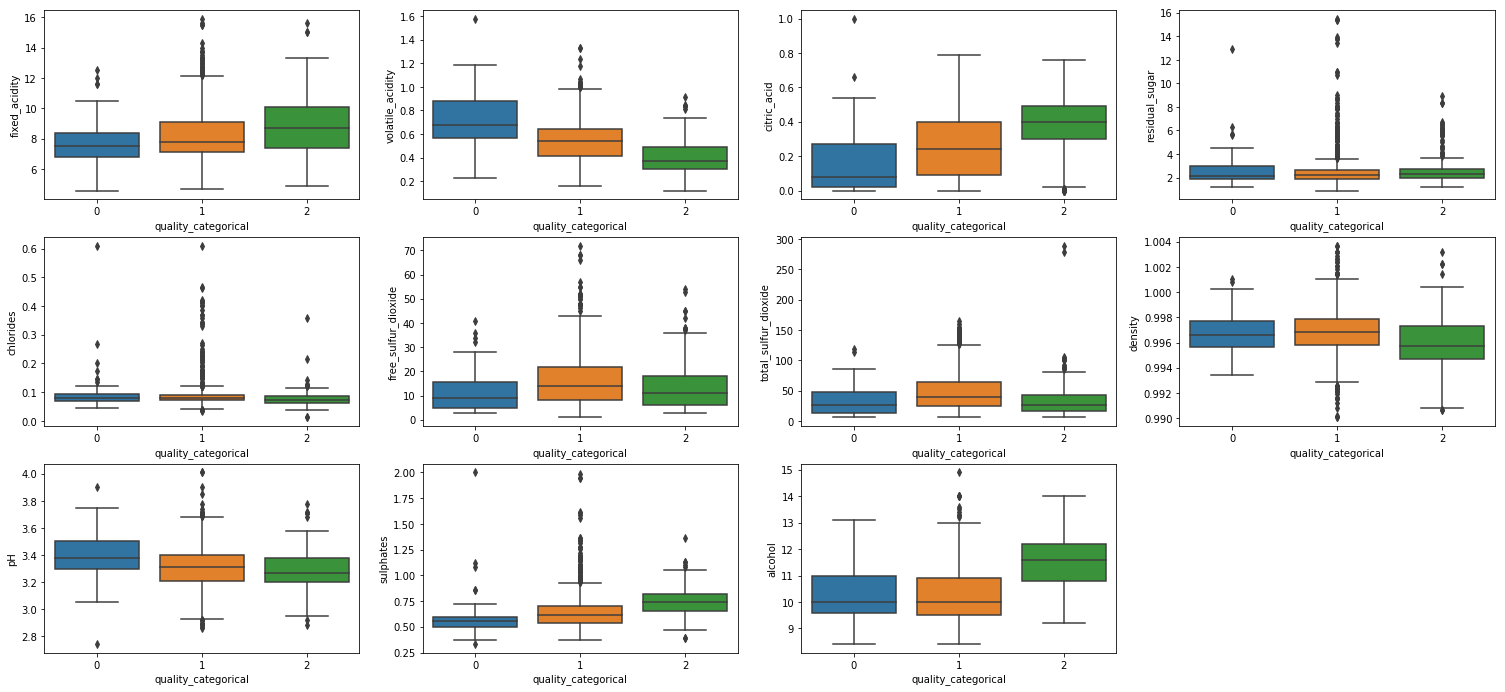

In [56]:
#
plt.figure(figsize=(26,16))

for column_index, column in enumerate(features_raw_new.columns):
    if column == 'quality_categorical':
        continue
    plt.subplot(4, 4, column_index + 1)
    sb.boxplot(x='quality_categorical', y=column, data=features_raw_new)

In [ ]:
#alcohol, volatile_acidity, citric_acid, suphates